# SMM638 Group CW

Video Presentation link:

https://drive.google.com/file/d/1L66NYbNA75BwNPY6HBnCkKgtspN3NwVH/view

##  Network Analysis

In [2]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import matplotlib.cm as cm
import scipy.stats as stats
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.patches import Patch
import random
import statistics

In [3]:
# Parse the XML file
tree = ET.parse('trading_floor.xml')
root = tree.getroot()

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes
for node in root.findall('.//{http://graphml.graphdrawing.org/xmlns}node'):
    node_id = node.attrib['id']
    node_attrs = {}
    for data in node.findall('.//{http://graphml.graphdrawing.org/xmlns}data'):
        key = data.attrib['key']
        value = data.text
        node_attrs[key] = value
    G.add_node(node_id, **node_attrs)

# Add edges
for edge in root.findall('.//{http://graphml.graphdrawing.org/xmlns}edge'):
    source = edge.attrib['source']
    target = edge.attrib['target']
    G.add_edge(source, target)

In [4]:
# Print nodes with attributes
print("Nodes with attributes:")
for node, attrs in G.nodes(data=True):
    print("Node:", node)
    print("Attributes:", attrs)

Nodes with attributes:
Node: 0
Attributes: {'d0': '4', 'd1': '1', 'd2': '0'}
Node: 1
Attributes: {'d0': '4', 'd1': '1', 'd2': '1'}
Node: 2
Attributes: {'d0': '4', 'd1': '1', 'd2': '2'}
Node: 3
Attributes: {'d0': '4', 'd1': '1', 'd2': '3'}
Node: 4
Attributes: {'d0': '7', 'd1': '1', 'd2': '4'}
Node: 5
Attributes: {'d0': '4', 'd1': '1', 'd2': '5'}
Node: 6
Attributes: {'d0': '4', 'd1': '1', 'd2': '6'}
Node: 7
Attributes: {'d0': '5', 'd1': '1', 'd2': '7'}
Node: 8
Attributes: {'d0': '7', 'd1': '1', 'd2': '8'}
Node: 9
Attributes: {'d0': '10', 'd1': '1', 'd2': '9'}
Node: 10
Attributes: {'d0': '1', 'd1': '1', 'd2': '10'}
Node: 11
Attributes: {'d0': '2', 'd1': '1', 'd2': '11'}
Node: 12
Attributes: {'d0': '1', 'd1': '1', 'd2': '12'}
Node: 13
Attributes: {'d0': '3', 'd1': '1', 'd2': '13'}
Node: 14
Attributes: {'d0': '3', 'd1': '1', 'd2': '14'}
Node: 15
Attributes: {'d0': '8', 'd1': '1', 'd2': '15'}
Node: 16
Attributes: {'d0': '2', 'd1': '2', 'd2': '0'}
Node: 17
Attributes: {'d0': '6', 'd1': '2', '

The above code prints each node in the graph along with its associated attributes, showing the data structure built from the 'trading_floor.xml' file.

In [5]:
# Print edges
print("\nEdges:")
print(G.edges())


Edges:
[('0', '191'), ('0', '190'), ('0', '108'), ('0', '73'), ('1', '2'), ('1', '3'), ('1', '191'), ('2', '3'), ('2', '4'), ('3', '4'), ('3', '5'), ('4', '6'), ('4', '123'), ('4', '85'), ('5', '7'), ('5', '76'), ('5', '44'), ('6', '7'), ('6', '8'), ('6', '85'), ('7', '8'), ('7', '9'), ('7', '37'), ('8', '9'), ('8', '164'), ('8', '163'), ('9', '10'), ('9', '11'), ('10', '11'), ('10', '12'), ('10', '170'), ('10', '48'), ('11', '12'), ('11', '13'), ('12', '13'), ('12', '88'), ('13', '14'), ('13', '94'), ('14', '16'), ('14', '142'), ('15', '16'), ('15', '17'), ('16', '46'), ('16', '107'), ('16', '122'), ('16', '138'), ('17', '18'), ('17', '19'), ('17', '72'), ('18', '19'), ('18', '20'), ('19', '20'), ('19', '21'), ('20', '22'), ('20', '124'), ('21', '22'), ('21', '23'), ('22', '24'), ('22', '169'), ('22', '171'), ('23', '24'), ('23', '25'), ('24', '25'), ('24', '26'), ('25', '26'), ('25', '27'), ('25', '162'), ('26', '28'), ('26', '74'), ('26', '169'), ('27', '29'), ('27', '178'), ('27',

The above code prints all edges in the graph, illustrating the connections between nodes as defined in the 'trading_floor.xml' file.

**Density** is a measure of how connected a graph is. It is defined as the ratio of the number of edges in the graph to the total number of possible edges in the graph. In simple terms, it quantifies the proportion of edges that exist in the graph relative to the total number of possible edges.

The **diameter** of a graph is the maximum shortest path length between any pair of nodes in the graph.Finding the diameter of a graph is useful for understanding the "spread" or "reach" of the graph. It indicates the maximum number of hops required to travel between the two most distant nodes in the network.

In [6]:
print(f"Number of nodes in graph G: {G.number_of_nodes()}")
print(f"Number of edges in graph G: {G.number_of_edges()}")
print("Density:",nx.density(G))
print("Diameter:",nx.diameter(G))

Number of nodes in graph G: 192
Number of edges in graph G: 384
Density: 0.020942408376963352
Diameter: 9


A density of 0.020942408376963352, indicates a relatively low level of interconnectivity among the nodes. This suggests that the graph is sparse, with only about 2.09% of the possible connections between nodes being actual connections. In practical terms, this might mean that the entities represented by nodes in your graph (such as traders) have limited direct relationships or interactions with each other.

The longest shortest path between any two nodes in the graph requires 9 steps. (Diameter 9) This indicates that the graph has a relatively large spread or reach, as it may take several steps to connect the most distant nodes within the network.

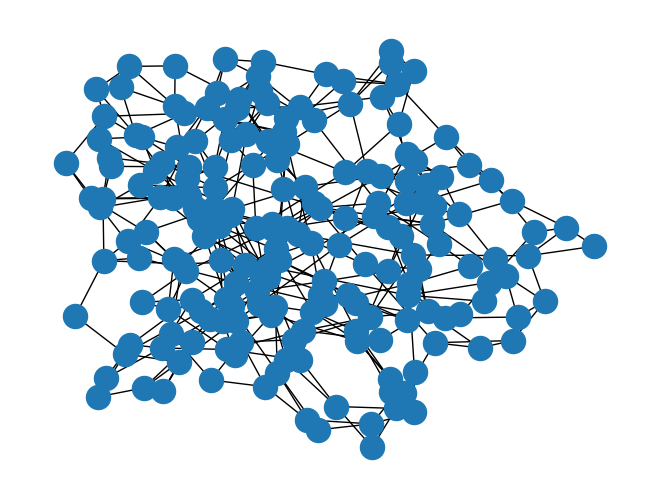

In [7]:
# Visualise network
nx.draw(G, with_labels=False)
plt.show()

In [8]:
# Median of all nodes
# Retrieve 'd0' values from the graph
d0_values = nx.get_node_attributes(G, 'd0')

# Convert values to a list of numbers
d0_values_list = [float(value) for value in d0_values.values()]

# Calculate the median
median_d0 = statistics.median(d0_values_list)

print(f"The median 'd0' value of all nodes in the network is: {median_d0}")

The median 'd0' value of all nodes in the network is: 4.0


In [9]:
# Get the degree of each node
degrees = G.degree()

# Print the degree of each node
print("Degree of each node:")
for node, degree in degrees:
    print(f"Node {node}: Degree {degree}")

Degree of each node:
Node 0: Degree 4
Node 1: Degree 3
Node 2: Degree 3
Node 3: Degree 4
Node 4: Degree 5
Node 5: Degree 4
Node 6: Degree 4
Node 7: Degree 5
Node 8: Degree 5
Node 9: Degree 4
Node 10: Degree 5
Node 11: Degree 4
Node 12: Degree 4
Node 13: Degree 4
Node 14: Degree 3
Node 15: Degree 2
Node 16: Degree 6
Node 17: Degree 4
Node 18: Degree 3
Node 19: Degree 4
Node 20: Degree 4
Node 21: Degree 3
Node 22: Degree 5
Node 23: Degree 3
Node 24: Degree 4
Node 25: Degree 5
Node 26: Degree 5
Node 27: Degree 4
Node 28: Degree 3
Node 29: Degree 4
Node 30: Degree 6
Node 31: Degree 4
Node 32: Degree 4
Node 33: Degree 5
Node 34: Degree 5
Node 35: Degree 4
Node 36: Degree 4
Node 37: Degree 3
Node 38: Degree 3
Node 39: Degree 3
Node 40: Degree 4
Node 41: Degree 4
Node 42: Degree 4
Node 43: Degree 5
Node 44: Degree 4
Node 45: Degree 4
Node 46: Degree 4
Node 47: Degree 4
Node 48: Degree 4
Node 49: Degree 5
Node 50: Degree 3
Node 51: Degree 4
Node 52: Degree 4
Node 53: Degree 5
Node 54: Degree 4

In [10]:
# Calculate degree centrality of the network
degree_centrality = nx.degree_centrality(G)

# Print degree centrality of each node
print("Degree centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

Degree centrality:
Node 0: 0.020942408376963352
Node 1: 0.015706806282722516
Node 2: 0.015706806282722516
Node 3: 0.020942408376963352
Node 4: 0.02617801047120419
Node 5: 0.020942408376963352
Node 6: 0.020942408376963352
Node 7: 0.02617801047120419
Node 8: 0.02617801047120419
Node 9: 0.020942408376963352
Node 10: 0.02617801047120419
Node 11: 0.020942408376963352
Node 12: 0.020942408376963352
Node 13: 0.020942408376963352
Node 14: 0.015706806282722516
Node 15: 0.010471204188481676
Node 16: 0.03141361256544503
Node 17: 0.020942408376963352
Node 18: 0.015706806282722516
Node 19: 0.020942408376963352
Node 20: 0.020942408376963352
Node 21: 0.015706806282722516
Node 22: 0.02617801047120419
Node 23: 0.015706806282722516
Node 24: 0.020942408376963352
Node 25: 0.02617801047120419
Node 26: 0.02617801047120419
Node 27: 0.020942408376963352
Node 28: 0.015706806282722516
Node 29: 0.020942408376963352
Node 30: 0.03141361256544503
Node 31: 0.020942408376963352
Node 32: 0.020942408376963352
Node 33: 0

Nodes with higher degree centrality are crucial for the network's connectivity and can significantly influence the network's dynamics

In [11]:
# Calculate the average degree centrality
average_degree_centrality = np.mean(list(degree_centrality.values()))

print(f"Average degree centrality: {average_degree_centrality}")

Average degree centrality: 0.02094240837696335


In [12]:
# Calculate betweenness centrality of the network
betweenness_centrality = nx.betweenness_centrality(G)

# Print betweenness centrality of each node
print("Betweenness centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

Betweenness centrality:
Node 0: 0.026084815646678427
Node 1: 0.008318531228423758
Node 2: 0.0027453667547357257
Node 3: 0.012934058807302118
Node 4: 0.030629469241759126
Node 5: 0.028866941862306036
Node 6: 0.013572232779314613
Node 7: 0.02583661673240929
Node 8: 0.020467375404168524
Node 9: 0.014246420220662801
Node 10: 0.035067472732952555
Node 11: 0.007683543302171023
Node 12: 0.013397271339541935
Node 13: 0.01641193456431814
Node 14: 0.0213165737235729
Node 15: 0.008786049477845101
Node 16: 0.08055501349006876
Node 17: 0.02080824529730954
Node 18: 0.0014019188612740567
Node 19: 0.0066052170633322475
Node 20: 0.016168794914070722
Node 21: 0.004010330466894137
Node 22: 0.024755150778727492
Node 23: 0.0026550082066633513
Node 24: 0.006365737325244751
Node 25: 0.01799779876687517
Node 26: 0.03275375572815775
Node 27: 0.016999041725550394
Node 28: 0.008567212310667807
Node 29: 0.00911233442164828
Node 30: 0.03874052740682667
Node 31: 0.010020780404494924
Node 32: 0.018138336511166493
No

Betweenness centrality is a measure of a node's centrality in a network, indicating the extent to which a node lies on paths between other nodes. Nodes with high betweenness centrality scores are those that frequently occur on the shortest paths between pairs of nodes in the network. They can be considered as having significant control or influence over the flow of information, resources, or whatever is being transmitted through the network.

In [13]:
# Calculate the average betweenness centrality
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))

print(f"Average betweenness centrality: {average_betweenness_centrality}")

Average betweenness centrality: 0.019465589694130616


Nodes with higher betweenness centrality are crucial for the network's integrity and efficiency, as they facilitate communication or connectivity between various parts of the network.

/var/folders/8g/483v___n4hv67s3df30b5wpc0000gn/T/ipykernel_16115/3126651359.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


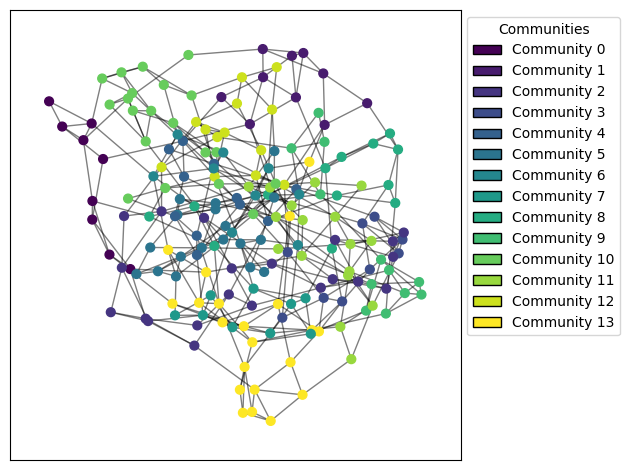

Communities:
Community 0: ['0', '184', '185', '186', '187', '188', '189', '190', '191']
Community 1: ['126', '127', '128', '129', '130', '131', '132', '133', '134', '135']
Community 2: ['94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114']
Community 3: ['7', '8', '9', '10', '11', '12', '13', '163', '164']
Community 4: ['14', '15', '16', '136', '137', '138', '139', '140', '141', '142', '143']
Community 5: ['17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '162', '165', '166', '167', '168', '169', '170', '172']
Community 6: ['27', '176', '177', '178', '179', '180', '181', '182', '183']
Community 7: ['28', '29', '30', '31', '32', '33', '34', '35', '36']
Community 8: ['37', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
Community 9: ['38', '39', '40', '41', '42', '43', '44', '45', '60', '61', '62', '63']
Community 10: ['58', '59', '144', '145', '146', '147', '148', '149

In [14]:
# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Detect communities
partition = community_louvain.best_partition(G)

# Visualize the communities
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()), ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

# Create a color legend for communities
legend_elements = [Patch(facecolor=cmap(i / max(partition.values())), edgecolor='black', label=f'Community {i}') for i in range(max(partition.values()) + 1)]
# Place the legend outside the plot
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title="Communities")

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()

# Print communities and their nodes
print("Communities:")
for i in set(partition.values()):
    members = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print(f"Community {i}: {members}")

# Calculate and print the node with highest degree centrality in each community
print("\nInfluential nodes by community (based on degree centrality):")
for i in set(partition.values()):
    subgraph = G.subgraph([nodes for nodes in partition.keys() if partition[nodes] == i])
    degree_centrality = nx.degree_centrality(subgraph)
    influential_node = max(degree_centrality, key=degree_centrality.get)
    print(f"Community {i}: Node {influential_node} with degree centrality {degree_centrality[influential_node]:.4f}")

The different colors of the nodes indicate different communities or clusters within the network.

This type of visualization helps in understanding the overall structure of the network and the way entities within it are interconnected.

In [15]:
# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Detect communities
partition = community_louvain.best_partition(G)

# Store influential nodes by their degree centrality in each community
influential_nodes_by_community = {}

# Calculate and store the node with highest degree centrality in each community
for i in set(partition.values()):
    subgraph = G.subgraph([node for node in partition.keys() if partition[node] == i])
    degree_centrality = nx.degree_centrality(subgraph)
    influential_node = max(degree_centrality, key=degree_centrality.get)
    influential_nodes_by_community[i] = influential_node

# Print d0 attribute for each influential node if the node exists in the graph
print("d0 attribute for influential nodes by community:")
for community, node_id in influential_nodes_by_community.items():
    # Check if the node exists in the graph and print the 'd0' attribute
    if node_id in G:
        d0_value = G.nodes[node_id].get('d0', 'Attribute not found')
        print(f"Community {community}: Node {node_id} with d0 = {d0_value}")
    else:
        print(f"Node {node_id} does not exist in the graph.")

d0 attribute for influential nodes by community:
Community 0: Node 190 with d0 = 9
Community 1: Node 133 with d0 = 2
Community 2: Node 105 with d0 = 3
Community 3: Node 8 with d0 = 7
Community 4: Node 138 with d0 = 5
Community 5: Node 22 with d0 = 4
Community 6: Node 178 with d0 = 1
Community 7: Node 31 with d0 = 10
Community 8: Node 49 with d0 = 6
Community 9: Node 43 with d0 = 10
Community 10: Node 155 with d0 = 5
Community 11: Node 88 with d0 = 2
Community 12: Node 117 with d0 = 5
Community 13: Node 4 with d0 = 7


In [16]:
# Find bridges in the network
nx.has_bridges(G)

# There are no bridges in this network 

False

In [17]:
# Connectivity
nx.is_connected(G)

True

In [18]:
nx.number_connected_components(G)

1

Since the number of connected components is 1, it confirms that the entire graph is one big connected component without any isolated nodes or subsets of nodes that are disconnected from the rest of the graph.

In [19]:
# Clustering
cl = nx.clustering(G)
print(cl)

{'0': 0.16666666666666666, '1': 0.3333333333333333, '2': 0.6666666666666666, '3': 0.3333333333333333, '4': 0.2, '5': 0, '6': 0.3333333333333333, '7': 0.2, '8': 0.3, '9': 0.3333333333333333, '10': 0.2, '11': 0.5, '12': 0.3333333333333333, '13': 0.16666666666666666, '14': 0, '15': 0, '16': 0, '17': 0.16666666666666666, '18': 0.6666666666666666, '19': 0.3333333333333333, '20': 0.16666666666666666, '21': 0, '22': 0, '23': 0.3333333333333333, '24': 0.3333333333333333, '25': 0.2, '26': 0.1, '27': 0.16666666666666666, '28': 0.3333333333333333, '29': 0.3333333333333333, '30': 0.2, '31': 0.3333333333333333, '32': 0.16666666666666666, '33': 0.1, '34': 0.2, '35': 0.3333333333333333, '36': 0.16666666666666666, '37': 0, '38': 0, '39': 0, '40': 0.16666666666666666, '41': 0.3333333333333333, '42': 0.5, '43': 0.3, '44': 0.3333333333333333, '45': 0.16666666666666666, '46': 0.16666666666666666, '47': 0.3333333333333333, '48': 0.3333333333333333, '49': 0.2, '50': 0.6666666666666666, '51': 0.5, '52': 0.5,

In [20]:
# Average clustering coef.
ave_cl = nx.average_clustering(G)
ave_cl
# The degree to which the neighbors of a given node link to each other

0.24935515873015882

In [21]:
# Initialize a dictionary to hold the median 'd0' value for each community
community_d0_opinions_median = {}

# Invert the partition to group nodes by their community
nodes_by_community = {}
for node, comm in partition.items():
    nodes_by_community.setdefault(comm, []).append(node)

# Loop through each community and the list of nodes in that community
for community, nodes in nodes_by_community.items():
    # Gather 'd0' scores for all nodes in the community that have a 'd0' attribute
    d0_scores = [float(d0_values[node]) for node in nodes if node in d0_values]
    
    # Calculate and store the median 'd0' score if there are any scores
    if d0_scores:
        community_d0_opinions_median[community] = statistics.median(d0_scores)

# Sort communities by their numeric identifier before printing
for community in sorted(community_d0_opinions_median, key=int):
    median_d0_opinion = community_d0_opinions_median[community]
    print(f"Community {community}: Median AI contribution opinion: {round(median_d0_opinion)}")

Community 0: Median AI contribution opinion: 4
Community 1: Median AI contribution opinion: 3
Community 2: Median AI contribution opinion: 5
Community 3: Median AI contribution opinion: 5
Community 4: Median AI contribution opinion: 5
Community 5: Median AI contribution opinion: 4
Community 6: Median AI contribution opinion: 3
Community 7: Median AI contribution opinion: 3
Community 8: Median AI contribution opinion: 5
Community 9: Median AI contribution opinion: 6
Community 10: Median AI contribution opinion: 4
Community 11: Median AI contribution opinion: 4
Community 12: Median AI contribution opinion: 5
Community 13: Median AI contribution opinion: 4


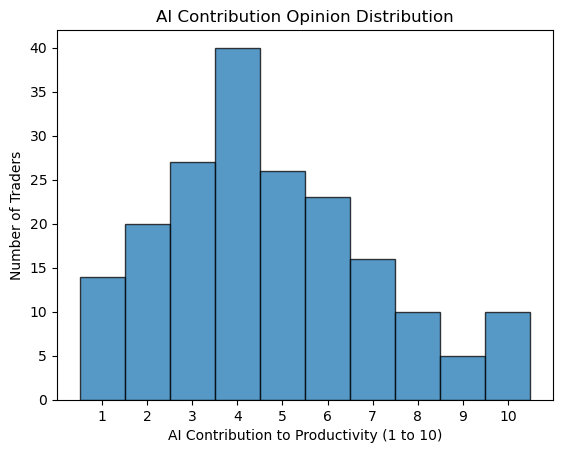

In [22]:
# Attribute Distribution 
d0_values = nx.get_node_attributes(G, 'd0')  
d0_values_list = list(d0_values.values())

# Convert string values to integers if they are not already
d0_values_list = [int(value) for value in d0_values_list]

# Create histogram with bins for each integer value
plt.hist(d0_values_list, bins=np.arange(0.5, 11.5, 1), edgecolor='black', alpha=0.75, align='mid')
plt.title('AI Contribution Opinion Distribution')
plt.xlabel('AI Contribution to Productivity (1 to 10)')
plt.ylabel('Number of Traders')
plt.xticks(range(1, 11))  # Set x-axis ticks to match the opinion scores
plt.show()

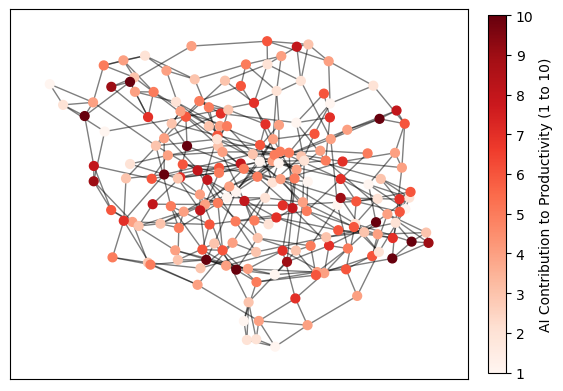

In [23]:
# Retrieve 'd0' values
d0_values = nx.get_node_attributes(G, 'd0')
max_d0_value = 10.0  # Assuming the maximum value for d0 is 10

# Normalize 'd0' values for nodes that have them
d0_values_normalized = [float(d0_values[node]) for node in G.nodes() if node in d0_values]

# Draw the network with normalized 'd0' values as node colors
nodes_drawn = nx.draw_networkx_nodes(G, pos, node_color=d0_values_normalized, node_size=40, cmap=plt.cm.Reds, vmin=1, vmax=10)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Create a colorbar with correct normalization
norm = plt.Normalize(vmin=1, vmax=10)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=plt.cm.Reds), ax=plt.gca(), orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('AI Contribution to Productivity (1 to 10)')

# Show the plot with the color legend
plt.show()

## Simulate random network for comparison

In [24]:
# Parameters for Barabási-Albert model
N = 192  # Final number of nodes
E = 384
m = E // (N - 1)
np.random.seed(42)
G_simulated = nx.barabasi_albert_graph(N, m, seed=42)

print(f"Number of nodes in G_simulated: {G_simulated.number_of_nodes()}")
print(f"Number of edges in G_simulated: {G_simulated.number_of_edges()}")

Number of nodes in G_simulated: 192
Number of edges in G_simulated: 380


In [25]:
# Assign a random value between 1 and 10 for d0 to each node to represent each trader's opinion about the 
#contribution of AI to his/her productivity and effectiveness in evaluating securities 
#(1 = not at all; 10 = to a great extent)
# Set the seed for reproducibility
np.random.seed(42)
for node in G_simulated.nodes():
    G_simulated.nodes[node]['d0'] = np.random.randint(1, 11)  # randint is inclusive at both ends

# Verify by printing the d0 value for the first few nodes
print("d0 values for all nodes in G_simulated:")
for node in G_simulated.nodes():
    print(f"Node {node}: d0 = {G_simulated.nodes[node]['d0']}")

d0 values for all nodes in G_simulated:
Node 0: d0 = 7
Node 1: d0 = 4
Node 2: d0 = 8
Node 3: d0 = 5
Node 4: d0 = 7
Node 5: d0 = 10
Node 6: d0 = 3
Node 7: d0 = 7
Node 8: d0 = 8
Node 9: d0 = 5
Node 10: d0 = 4
Node 11: d0 = 8
Node 12: d0 = 8
Node 13: d0 = 3
Node 14: d0 = 6
Node 15: d0 = 5
Node 16: d0 = 2
Node 17: d0 = 8
Node 18: d0 = 6
Node 19: d0 = 2
Node 20: d0 = 5
Node 21: d0 = 1
Node 22: d0 = 10
Node 23: d0 = 6
Node 24: d0 = 9
Node 25: d0 = 1
Node 26: d0 = 10
Node 27: d0 = 3
Node 28: d0 = 7
Node 29: d0 = 4
Node 30: d0 = 9
Node 31: d0 = 3
Node 32: d0 = 5
Node 33: d0 = 3
Node 34: d0 = 7
Node 35: d0 = 5
Node 36: d0 = 9
Node 37: d0 = 7
Node 38: d0 = 2
Node 39: d0 = 4
Node 40: d0 = 9
Node 41: d0 = 2
Node 42: d0 = 10
Node 43: d0 = 9
Node 44: d0 = 10
Node 45: d0 = 5
Node 46: d0 = 2
Node 47: d0 = 4
Node 48: d0 = 7
Node 49: d0 = 8
Node 50: d0 = 3
Node 51: d0 = 1
Node 52: d0 = 4
Node 53: d0 = 2
Node 54: d0 = 8
Node 55: d0 = 4
Node 56: d0 = 2
Node 57: d0 = 6
Node 58: d0 = 6
Node 59: d0 = 10
Node

In [26]:
# Median of all nodes
# Retrieve 'd0' values from the graph
d0_values = nx.get_node_attributes(G_simulated, 'd0')

# Convert values to a list of numbers
d0_values_list = [float(value) for value in d0_values.values()]

# Calculate the median
median_d0 = statistics.median(d0_values_list)

print(f"The median 'd0' value of all nodes in the network is: {median_d0}")

The median 'd0' value of all nodes in the network is: 6.0


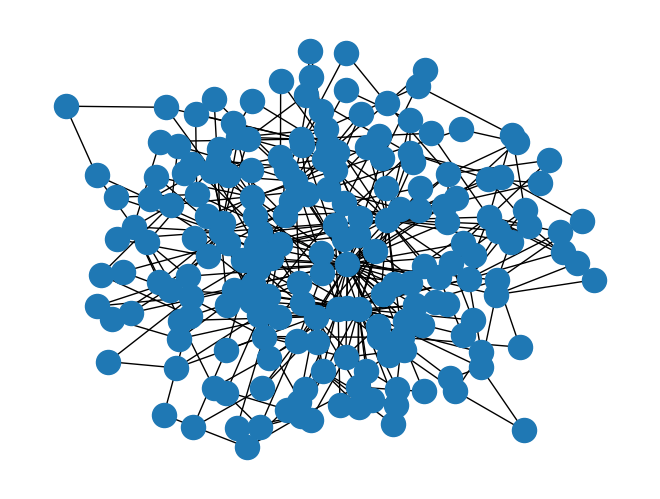

In [27]:
# Visualise network
nx.draw(G_simulated, with_labels=False)
plt.show()

In [28]:
print("Density:",nx.density(G_simulated))
print("Diameter:",nx.diameter(G_simulated))

Density: 0.020724258289703316
Diameter: 6


In [29]:
# Calculate degree centrality of the network
degree_centrality = nx.degree_centrality(G_simulated)

# Print degree centrality of each node
print("Degree centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

Degree centrality:
Node 0: 0.23560209424083772
Node 1: 0.16753926701570682
Node 2: 0.04712041884816754
Node 3: 0.015706806282722516
Node 4: 0.16753926701570682
Node 5: 0.07329842931937174
Node 6: 0.1099476439790576
Node 7: 0.020942408376963352
Node 8: 0.041884816753926704
Node 9: 0.02617801047120419
Node 10: 0.05235602094240838
Node 11: 0.015706806282722516
Node 12: 0.020942408376963352
Node 13: 0.03141361256544503
Node 14: 0.02617801047120419
Node 15: 0.05235602094240838
Node 16: 0.06806282722513089
Node 17: 0.03141361256544503
Node 18: 0.03664921465968587
Node 19: 0.02617801047120419
Node 20: 0.020942408376963352
Node 21: 0.02617801047120419
Node 22: 0.04712041884816754
Node 23: 0.010471204188481676
Node 24: 0.03141361256544503
Node 25: 0.02617801047120419
Node 26: 0.05235602094240838
Node 27: 0.05235602094240838
Node 28: 0.015706806282722516
Node 29: 0.015706806282722516
Node 30: 0.015706806282722516
Node 31: 0.03141361256544503
Node 32: 0.02617801047120419
Node 33: 0.03664921465968

In [30]:
# Calculate the average degree centrality
average_degree_centrality = np.mean(list(degree_centrality.values()))

print(f"Average degree centrality: {average_degree_centrality}")

Average degree centrality: 0.02072425828970332


In [31]:
# Calculate betweenness centrality of the network
betweenness_centrality = nx.betweenness_centrality(G_simulated)

# Print betweenness centrality of each node
print("Betweenness centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

Betweenness centrality:
Node 0: 0.3662216508444285
Node 1: 0.25350187907891497
Node 2: 0.0433886435841426
Node 3: 0.0005095560096856838
Node 4: 0.2235006751352324
Node 5: 0.06685350097004154
Node 6: 0.12089037887144301
Node 7: 0.0180690578435375
Node 8: 0.021130259541002207
Node 9: 0.019195997153414912
Node 10: 0.03732101847169197
Node 11: 0.0009217258169156665
Node 12: 0.010096745022546972
Node 13: 0.01738717108275157
Node 14: 0.019462746556857723
Node 15: 0.04872782347354015
Node 16: 0.0542223267320246
Node 17: 0.01907460056877332
Node 18: 0.0337013055078463
Node 19: 0.01916630929154955
Node 20: 0.012397259561759582
Node 21: 0.00942623494520707
Node 22: 0.03148425447061434
Node 23: 0.0008455001705686123
Node 24: 0.017016327020055157
Node 25: 0.015253441667571224
Node 26: 0.023697143011733
Node 27: 0.04223297924094612
Node 28: 0.0031601254445013057
Node 29: 0.004008651959635053
Node 30: 0.0014867268917971596
Node 31: 0.011951811077562786
Node 32: 0.01972858842754941
Node 33: 0.0130339

In [32]:
# Calculate the average betweenness centrality
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))

print(f"Average betweenness centrality: {average_betweenness_centrality}")

Average betweenness centrality: 0.011615631027831358


In [33]:
# Clustering
cl = nx.clustering(G_simulated)
print(cl)

{0: 0.015151515151515152, 1: 0.04032258064516129, 2: 0.08333333333333333, 3: 0.6666666666666666, 4: 0.02620967741935484, 5: 0.06593406593406594, 6: 0.03333333333333333, 7: 0.16666666666666666, 8: 0.07142857142857142, 9: 0, 10: 0.044444444444444446, 11: 0.6666666666666666, 12: 0.16666666666666666, 13: 0.2, 14: 0, 15: 0.022222222222222223, 16: 0.01282051282051282, 17: 0.13333333333333333, 18: 0, 19: 0, 20: 0, 21: 0.1, 22: 0.05555555555555555, 23: 0, 24: 0, 25: 0, 26: 0.022222222222222223, 27: 0.022222222222222223, 28: 0.3333333333333333, 29: 0.3333333333333333, 30: 0.3333333333333333, 31: 0.13333333333333333, 32: 0.1, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 1.0, 39: 0, 40: 1.0, 41: 0, 42: 1.0, 43: 0, 44: 0, 45: 0.16666666666666666, 46: 0, 47: 0, 48: 0, 49: 0.01818181818181818, 50: 0.06666666666666667, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0.3333333333333333, 56: 0, 57: 0.06666666666666667, 58: 0, 59: 0, 60: 0, 61: 0.06666666666666667, 62: 0.2, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70

In [34]:
# Average clustering coef.
ave_cl = nx.average_clustering(G_simulated)
ave_cl

0.1217016427512899